In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [2]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\code'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['APT_List.pkl',
 'APT_Tidy.pkl',
 'Cereal.pkl',
 'Univ_Admit.pkl',
 'Used_Cars.pkl']

In [5]:
df = pd.read_pickle('Used_Cars.pkl')

In [6]:
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            1268 non-null   int64
 1   Age              1268 non-null   int64
 2   KM               1268 non-null   int64
 3   HP               1268 non-null   int64
 4   MetColor         1268 non-null   int32
 5   Automatic        1268 non-null   int32
 6   CC               1268 non-null   int64
 7   Doors            1268 non-null   int64
 8   Weight           1268 non-null   int64
 9   FuelType_CNG     1268 non-null   int32
 10  FuelType_Diesel  1268 non-null   int32
 11  FuelType_Petrol  1268 non-null   int32
dtypes: int32(5), int64(7)
memory usage: 94.2 KB


In [8]:
df = df.drop(columns = 'FuelType_CNG')

In [9]:
df.corr().round(2)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
Price,1.00,-0.80,-0.51,0.22,0.08,0.04,0.05,0.16,0.22,-0.08,0.08
Age,-0.80,1.00,0.35,-0.04,-0.07,0.06,-0.08,-0.09,-0.21,-0.08,0.08
KM,-0.51,0.35,1.00,-0.33,-0.05,-0.09,0.39,0.02,0.30,0.49,-0.51
HP,0.22,-0.04,-0.33,1.00,0.08,0.01,-0.02,0.12,-0.09,-0.67,0.60
MetColor,0.08,-0.07,-0.05,0.08,1.00,-0.02,0.03,0.09,0.04,-0.02,0.01
Automatic,0.04,0.06,-0.09,0.01,-0.02,1.00,-0.08,-0.04,0.08,-0.08,0.08
CC,0.05,-0.08,0.39,-0.02,0.03,-0.08,1.00,0.14,0.80,0.75,-0.72
Doors,0.16,-0.09,0.02,0.12,0.09,-0.04,0.14,1.00,0.41,0.02,-0.03
Weight,0.22,-0.21,0.30,-0.09,0.04,0.08,0.80,0.41,1.00,0.67,-0.68
FuelType_Diesel,-0.08,-0.08,0.49,-0.67,-0.02,-0.08,0.75,0.02,0.67,1.00,-0.93


In [10]:
yvar = 'Price'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size = 0.8, random_state = 0
)

In [13]:
y_train.mean()

9702.940828402367

In [14]:
y_valid.mean()

9672.53937007874

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [16]:
model = LinearRegression()

In [17]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [18]:
model.fit(X = X_train, y = y_train)

LinearRegression()

In [19]:
X_train.columns

Index(['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight',
       'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

In [20]:
model.intercept_

-2499.615609588005

In [21]:
model.coef_

array([-9.64214707e+01, -1.64249138e-02, -1.65358171e+01,  2.76941603e-01,
        8.49506387e+01,  1.59610106e+00, -1.76943302e+01,  1.67446150e+01,
       -1.44461717e+03,  9.66630841e+02])

In [22]:
pd.Series(data = model.coef_, index = X_train.columns).round(4)

Age                 -96.4215
KM                   -0.0164
HP                  -16.5358
MetColor              0.2769
Automatic            84.9506
CC                    1.5961
Doors               -17.6943
Weight               16.7446
FuelType_Diesel   -1444.6172
FuelType_Petrol     966.6308
dtype: float64

In [23]:
model.score(X = X_train, y = y_train)

0.7403601218626847

In [24]:
model.score(X = X_valid, y = y_valid)

0.7562055844442452

In [25]:
y_vpred1 = model.predict(X = X_valid)

In [26]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.070285e+06,1034.545687,0.012454,0.111596,798.087824,0.086588


In [27]:
ridge = Ridge(alpha = 1)

In [28]:
ridge.fit(X = X_train, y = y_train)

Ridge(alpha=1)

In [29]:
ridge.score(X = X_train, y = y_train)

0.740226526

In [30]:
ridge.score(X = X_valid, y = y_valid)

0.7559795551257751

In [31]:
lasso = Lasso(alpha = 1)

In [32]:
lasso.fit(X = X_train, y = y_train)

Lasso(alpha=1)

In [33]:
lasso.score(X = X_train, y = y_train)

0.7401393705959303

In [34]:
lasso.score(X = X_valid, y = y_valid)

0.7557221716850551

In [35]:
y_vpred2 = ridge.predict(X = X_valid)

In [36]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.070285e+06,1034.545687,0.012454,0.111596,798.087824,0.086588


In [37]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred2)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.071277e+06,1035.025156,0.01248,0.111716,799.251673,0.086684


In [38]:
y_vpred3 = lasso.predict(X = X_valid)

In [39]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred3)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.072407e+06,1035.570864,0.012495,0.111781,799.757384,0.086731


In [40]:
pd.DataFrame(data = {'Linear': model.coef_, 
                     'Ridge': ridge.coef_, 
                     'Lasso': lasso.coef_}, 
             index = X_train.columns)

,Linear,Ridge,Lasso
Age,-96.421471,-95.926811,-95.741951
KM,-0.016425,-0.016457,-0.016468
HP,-16.535817,-6.387440,-3.587116
MetColor,0.276942,1.072056,0.000000
Automatic,84.950639,106.440523,94.780422
CC,1.596101,0.847803,0.632485
Doors,-17.694330,-11.216779,-9.180404
Weight,16.744615,16.235816,16.166377
FuelType_Diesel,-1444.617166,-788.410551,-594.417095
FuelType_Petrol,966.630841,931.587567,937.137253


In [41]:
alphas = np.arange(0.1, 20.1, 0.1)
valid_scores = []

for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge.fit(X = X_train, y = y_train)
    r_squared = ridge.score(X = X_valid, y = y_valid)
    valid_scores.append(r_squared)

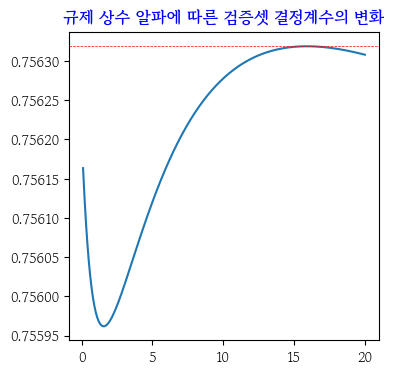

In [42]:
valid_score_max = np.max(valid_scores)
sns.lineplot(x = alphas, y = valid_scores)
plt.axhline(y = valid_score_max, color = 'red', ls = '--', lw = 0.5)
plt.title(label = '규제 상수 알파에 따른 검증셋 결정계수의 변화', 
          fontdict = {'fontweight': 'bold', 'color': 'blue'});

In [43]:
best_alpha_index = np.argmax(valid_scores)

In [44]:
alphas[best_alpha_index]

15.9

In [45]:
ridge.set_params(alpha = alphas[best_alpha_index])
ridge.fit(X = X_train, y = y_train)

Ridge(alpha=15.9)

In [46]:
ridge.score(X = X_train, y = y_train)

0.7388391335644768

In [47]:
model.score(X = X_valid, y = y_valid)

0.7562055844442452

In [48]:
ridge.score(X = X_valid, y = y_valid)

0.7563188010181646

In [49]:
y_vpred4 = ridge.predict(X = X_valid)

In [50]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.070285e+06,1034.545687,0.012454,0.111596,798.087824,0.086588


In [51]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred4)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.069788e+06,1034.305441,0.012537,0.11197,801.908173,0.086985


In [52]:
alphas = np.arange(0.1, 20.1, 0.1)
valid_scores = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(X = X_train, y = y_train)
    r_squared = lasso.score(X = X_valid, y = y_valid)
    valid_scores.append(r_squared)

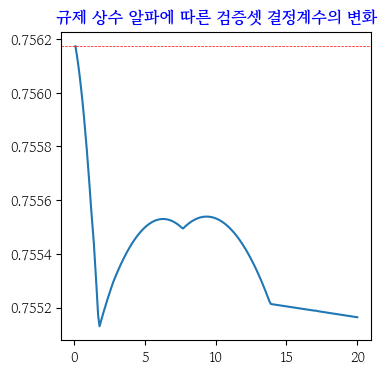

In [53]:
valid_score_max = np.max(valid_scores)
sns.lineplot(x = alphas, y = valid_scores)
plt.axhline(y = valid_score_max, color = 'red', ls = '--', lw = 0.5)
plt.title(label = '규제 상수 알파에 따른 검증셋 결정계수의 변화', 
          fontdict = {'fontweight': 'bold', 'color': 'blue'});

In [54]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [55]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\data'

In [56]:
os.chdir('../data')

In [57]:
os.listdir()

['APT_List.pkl',
 'APT_Tidy.pkl',
 'Cereal.pkl',
 'Univ_Admit.pkl',
 'Used_Cars.pkl']

In [58]:
df = pd.read_pickle('Univ_Admit.pkl')

In [59]:
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,Fail,380.0,3.61,0,0,1,0
1,Pass,660.0,3.67,0,0,1,0
2,Pass,800.0,4.00,1,0,0,0
3,Pass,640.0,3.19,0,0,0,1
4,Fail,520.0,2.93,0,0,0,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   1687 non-null   object 
 1   gre     1687 non-null   float64
 2   gpa     1687 non-null   float64
 3   rank_1  1687 non-null   int32  
 4   rank_2  1687 non-null   int32  
 5   rank_3  1687 non-null   int32  
 6   rank_4  1687 non-null   int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 66.0+ KB


In [61]:
df = df.drop(columns = 'rank_1')

In [62]:
yvar = 'admit'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size = 0.7, random_state = 0, stratify = y
)

In [65]:
X_train.shape

(1180, 5)

In [66]:
X_valid.shape

(507, 5)

In [67]:
y_train.value_counts(normalize = True)

admit
Fail    0.688983
Pass    0.311017
Name: proportion, dtype: float64

In [68]:
y_valid.value_counts(normalize = True)

admit
Fail    0.690335
Pass    0.309665
Name: proportion, dtype: float64

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(penalty = None, max_iter = 1000)

In [71]:
model.fit(X = X_train, y = y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [72]:
model.score(X = X_train, y = y_train)

0.7211864406779661

In [73]:
model.score(X = X_valid, y = y_valid)

0.717948717948718

In [74]:
model.coef_[0]

array([ 0.00355418,  1.10317078, -0.74084145, -1.37184994, -1.7917002 ])

In [75]:
pd.Series(data = model.coef_[0], index = X.columns)

gre       0.003554
gpa       1.103171
rank_2   -0.740841
rank_3   -1.371850
rank_4   -1.791700
dtype: float64

In [76]:
pd.Series(data = np.exp(model.coef_[0]), index = X.columns)

gre       1.003561
gpa       3.013707
rank_2    0.476713
rank_3    0.253637
rank_4    0.166677
dtype: float64

In [77]:
y_vprob1 = model.predict_proba(X = X_valid)

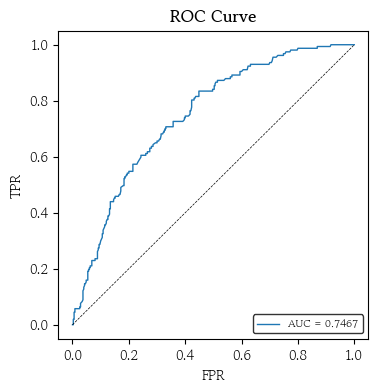

In [78]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1)

In [79]:
y_vpred1 = model.predict(X = X_valid)

In [80]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,312,105,417
Pass,38,52,90
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7482    0.8914    0.8136       350
        Pass     0.5778    0.3312    0.4211       157

    accuracy                         0.7179       507
   macro avg     0.6630    0.6113    0.6173       507
weighted avg     0.6954    0.7179    0.6920       507



In [81]:
ridge = LogisticRegression(penalty = 'l2', C = 10, solver = 'liblinear')

In [82]:
ridge.fit(X = X_train, y = y_train)

LogisticRegression(C=10, solver='liblinear')

In [83]:
ridge.score(X = X_train, y = y_train)

0.7237288135593221

In [84]:
ridge.score(X = X_valid, y = y_valid)

0.7159763313609467

In [85]:
from sklearn import metrics

In [86]:
y_vpred2 = ridge.predict(X = X_valid)

In [87]:
metrics.accuracy_score(y_true = y_valid, y_pred = y_vpred2)

0.7159763313609467

In [88]:
lasso = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear')

In [89]:
lasso.fit(X = X_train, y = y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [90]:
lasso.score(X = X_train, y = y_train)

0.7245762711864406

In [91]:
lasso.score(X = X_valid, y = y_valid)

0.7199211045364892

In [92]:
y_vprob2 = ridge.predict_proba(X = X_valid)

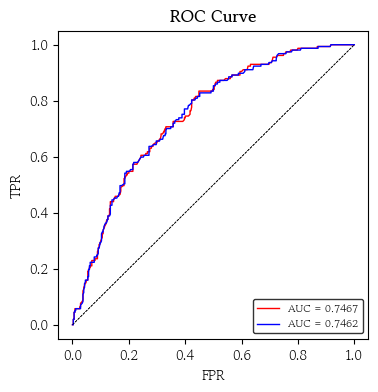

In [93]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'blue')

In [94]:
y_vpred2 = ridge.predict(X = X_valid)

In [95]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,312,105,417
Pass,38,52,90
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7482    0.8914    0.8136       350
        Pass     0.5778    0.3312    0.4211       157

    accuracy                         0.7179       507
   macro avg     0.6630    0.6113    0.6173       507
weighted avg     0.6954    0.7179    0.6920       507



In [96]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred2)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,314,108,422
Pass,36,49,85
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7441    0.8971    0.8135       350
        Pass     0.5765    0.3121    0.4050       157

    accuracy                         0.7160       507
   macro avg     0.6603    0.6046    0.6092       507
weighted avg     0.6922    0.7160    0.6870       507



In [97]:
y_vprob3 = lasso.predict_proba(X = X_valid)

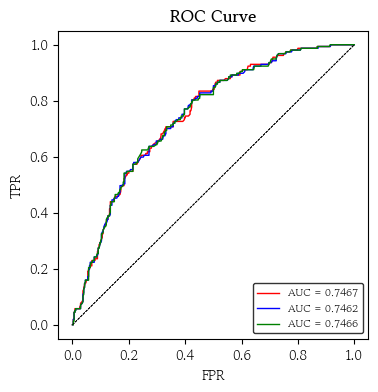

In [98]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'blue')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob3, color = 'green')

In [99]:
y_vpred3 = lasso.predict(X = X_valid)

In [100]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred3)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,314,106,420
Pass,36,51,87
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7476    0.8971    0.8156       350
        Pass     0.5862    0.3248    0.4180       157

    accuracy                         0.7199       507
   macro avg     0.6669    0.6110    0.6168       507
weighted avg     0.6976    0.7199    0.6925       507



In [101]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [102]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\data'

In [103]:
os.chdir('../data')

In [104]:
os.listdir()

['APT_List.pkl',
 'APT_Tidy.pkl',
 'Cereal.pkl',
 'Univ_Admit.pkl',
 'Used_Cars.pkl']

In [105]:
df = pd.read_pickle('Univ_Admit.pkl')

In [106]:
df = df.drop(columns = 'rank_1')

In [107]:
yvar = 'admit'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X = X_train)

In [113]:
X_valid = scaler.transform(X = X_valid)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(penalty = None)

In [116]:
model.fit(X = X_train, y = y_train)

LogisticRegression(penalty=None)

In [117]:
model.coef_[0]

array([ 0.34952081,  0.36181317, -0.35168052, -0.64086073, -0.69001373])

In [118]:
pd.Series(data = np.exp(model.coef_[0]), index = X.columns)

gre       1.418388
gpa       1.435931
rank_2    0.703505
rank_3    0.526839
rank_4    0.501569
dtype: float64

In [119]:
pd.DataFrame(data = X_train, columns = X.columns).head()

,gre,gpa,rank_2,rank_3,rank_4
0,0.073594,0.056783,1.385926,-0.687865,-0.469328
1,-0.737054,-0.678177,-0.721539,1.453773,-0.469328
2,-1.953025,-1.964356,-0.721539,-0.687865,2.130706
3,-2.459680,-2.454329,-0.721539,1.453773,-0.469328
4,-0.230399,-0.249450,1.385926,-0.687865,-0.469328
